# Imports

In [1]:
import numpy as np
import sys
import pickle
import os

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)
import covariance as c
import visualization as viz

# Set Directory Paths

In [3]:
# Directory path to load formatted Thickness At Path Data
%store -r thickAtPath_dataDir
# Directory path to save Calcualted Analysis Data
%store -r thickAtPath_CalData
# Directory path to save Figures
%store -r thickAtPath_Fig
# Directory path to save Calcualted Analysis Data
%store -r path_CalData

# Loading

## Thickness Values at Pathology Regions

### Loading Thickness Values at Pathology Regions

In [4]:
# HCthicknessAtPath
with open(os.path.join(thickAtPath_dataDir, 'HCthicknessAtPath.pkl'), 'rb') as f:
    HCthicknessAtPath = pickle.load(f)
f.close()

# TAUthicknessAtPath
with open(os.path.join(thickAtPath_dataDir, 'TAUthicknessAtPath.pkl'), 'rb') as f:
    TAUthicknessAtPath = pickle.load(f)
f.close()

# TDPthicknessAtPath
with open(os.path.join(thickAtPath_dataDir, 'TDPthicknessAtPath.pkl'), 'rb') as f:
    TDPthicknessAtPath = pickle.load(f)
f.close()

### Loading Thickness Values at Pathology Regions - Z Score

In [5]:
# HCthicknessAtPath_z
with open(os.path.join(thickAtPath_CalData, 'HCthicknessAtPath_z.pkl'), 'rb') as f:
    HCthicknessAtPath_z = pickle.load(f)
f.close()

# TAUthicknessAtPath_z
with open(os.path.join(thickAtPath_CalData, 'TAUthicknessAtPath_z.pkl'), 'rb') as f:
    TAUthicknessAtPath_z = pickle.load(f)
f.close()

# TDPthicknessAtPath_z
with open(os.path.join(thickAtPath_CalData, 'TDPthicknessAtPath_z.pkl'), 'rb') as f:
    TDPthicknessAtPath_z = pickle.load(f)
f.close()

### Loading Thickness Values at Pathology Regions - W Score

In [6]:
# HCthicknessAtPath_w
with open(os.path.join(thickAtPath_CalData, 'HCthicknessAtPath_w.pkl'), 'rb') as f:
    HCthicknessAtPath_w = pickle.load(f)
f.close()

# TAUthicknessAtPath_w
with open(os.path.join(thickAtPath_CalData, 'TAUthicknessAtPath_w.pkl'), 'rb') as f:
    TAUthicknessAtPath_w = pickle.load(f)
f.close()

# TDPthicknessAtPath_w
with open(os.path.join(thickAtPath_CalData, 'TDPthicknessAtPath_w.pkl'), 'rb') as f:
    TDPthicknessAtPath_w = pickle.load(f)
f.close()

## Volume Values at Pathology Regions

### Loading Volume Values at Pathology Regions

In [7]:
# HCVolumeAtPath
with open(os.path.join(thickAtPath_dataDir, 'HCVolumeAtPath.pkl'), 'rb') as f:
    HCVolumeAtPath = pickle.load(f)
f.close()

# TAUVolumeAtPath
with open(os.path.join(thickAtPath_dataDir, 'TAUVolumeAtPath.pkl'), 'rb') as f:
    TAUVolumeAtPath = pickle.load(f)
f.close()

# TDPVolumeAtPath
with open(os.path.join(thickAtPath_dataDir, 'TDPVolumeAtPath.pkl'), 'rb') as f:
    TDPVolumeAtPath = pickle.load(f)
f.close()

### Loading Volume Values at Pathology Regions - Z Score

In [8]:
# HCVolumeAtPath_z
with open(os.path.join(thickAtPath_CalData, 'HCVolumeAtPath_z.pkl'), 'rb') as f:
    HCVolumeAtPath_z = pickle.load(f)
f.close()

# TAUVolumeAtPath_z
with open(os.path.join(thickAtPath_CalData, 'TAUVolumeAtPath_z.pkl'), 'rb') as f:
    TAUVolumeAtPath_z = pickle.load(f)
f.close()

# TDPVolumeAtPath_z
with open(os.path.join(thickAtPath_CalData, 'TDPVolumeAtPath_z.pkl'), 'rb') as f:
    TDPVolumeAtPath_z = pickle.load(f)
f.close()

### Loading Volume Values at Pathology Regions - W Score

In [9]:
# HCVolumeAtPath_w
with open(os.path.join(thickAtPath_CalData, 'HCVolumeAtPath_w.pkl'), 'rb') as f:
    HCVolumeAtPath_w = pickle.load(f)
f.close()

# TAUVolumeAtPath_w
with open(os.path.join(thickAtPath_CalData, 'TAUVolumeAtPath_w.pkl'), 'rb') as f:
    TAUVolumeAtPath_w = pickle.load(f)
f.close()

# TDPVolumeAtPath_w
with open(os.path.join(thickAtPath_CalData, 'TDPVolumeAtPath_w.pkl'), 'rb') as f:
    TDPVolumeAtPath_w = pickle.load(f)
f.close()

In [10]:
HCVolumeAtPath_w.shape

(54, 40)

In [11]:
TAUVolumeAtPath_w.shape

(26, 40)

In [12]:
TDPVolumeAtPath_w.shape

(30, 40)

In [13]:
# pathNames_TAU_Drop
with open(os.path.join(path_CalData, 'pathNames_TAU_Drop.pkl'), 'rb') as f:
    pathNames_TAU_Drop = pickle.load(f)
f.close()

# pathNames_TDP_Drop
with open(os.path.join(path_CalData, 'pathNames_TDP_Drop.pkl'), 'rb') as f:
    pathNames_TDP_Drop = pickle.load(f)
f.close()

# Parameter/Variable Setting

## P-value Threshold List

In [14]:
# pthresh_list = [0.05]
pthresh = 0.05

## Covariance Matrix Threshold (to remove noise)

In [15]:
cov_thresh = 0.1

## Helper Function - Calculating Cov Mat

In [16]:
def calCovMatDict(dataHC, dataTAU, dataTDP, pthresh, cov_thresh):
    cov_dict = {}
    
    covMatHC = c.covCal(dataHC, dataHC, cov_thresh)
    covMatTAU = c.covCal(dataTAU, dataTAU, cov_thresh)
    covMatTDP = c.covCal(dataTDP, dataTDP, cov_thresh)
    
    cmpCovTAU_gt_TDP, cmpCovTDP_gt_TAU = c.covCalSigXY(dataTAU, dataTDP, covMatTAU, covMatTDP, pthresh, cov_thresh)
    cmpCovTAU_gt_HC, cmpCovTAU_lt_HC = c.covCalSigXY(dataTAU, dataHC, covMatTAU, covMatHC, pthresh, cov_thresh)
    cmpCovTDP_gt_HC, cmpCovTDP_lt_HC = c.covCalSigXY(dataTDP, dataHC, covMatTDP, covMatHC, pthresh, cov_thresh)
    
    cmpCovTAU_gt_TDP_raw, cmpCovTDP_gt_TAU_raw = c.covCalSigXYRaw(dataTAU, dataTDP, covMatTAU, covMatTDP, cov_thresh)
    cmpCovTAU_gt_HC_raw, cmpCovTAU_lt_HC_raw = c.covCalSigXYRaw(dataTAU, dataHC, covMatTAU, covMatHC, cov_thresh)
    cmpCovTDP_gt_HC_raw, cmpCovTDP_lt_HC_raw = c.covCalSigXYRaw(dataTDP, dataHC, covMatTDP, covMatHC, cov_thresh)
    
    cov_dict["HC"] = covMatHC
    cov_dict["TAU"] = covMatTAU
    cov_dict["TDP"] = covMatTDP
    
    cov_dict["TAU_gt_TDP"] = cmpCovTAU_gt_TDP
    cov_dict["TDP_gt_TAU"] = cmpCovTDP_gt_TAU
    cov_dict["TAU_gt_HC"] = cmpCovTAU_gt_HC
    cov_dict["TAU_lt_HC"] = cmpCovTAU_lt_HC
    cov_dict["TDP_gt_HC"] = cmpCovTDP_gt_HC
    cov_dict["TDP_lt_HC"] = cmpCovTDP_lt_HC
    
    cov_dict["TAU_gt_TDP_raw"] = cmpCovTAU_gt_TDP_raw
    cov_dict["TDP_gt_TAU_raw"] = cmpCovTDP_gt_TAU_raw
    cov_dict["TAU_gt_HC_raw"] = cmpCovTAU_gt_HC_raw
    cov_dict["TAU_lt_HC_raw"] = cmpCovTAU_lt_HC_raw
    cov_dict["TDP_gt_HC_raw"] = cmpCovTDP_gt_HC_raw
    cov_dict["TDP_lt_HC_raw"] = cmpCovTDP_lt_HC_raw
    
    return cov_dict

# Calculate Covariance Matrices

## Thickness At Path Data

In [17]:
cov_thickAtPath_dict = calCovMatDict(HCthicknessAtPath, TAUthicknessAtPath, TDPthicknessAtPath, 
                                     pthresh, cov_thresh)

## Thickness At Path Data - Z Score

In [18]:
cov_thickAtPath_z_dict = calCovMatDict(HCthicknessAtPath_z, TAUthicknessAtPath_z, TDPthicknessAtPath_z, 
                                       pthresh, cov_thresh)

## Thickness At Path Data - W Score

In [19]:
cov_thickAtPath_w_dict = calCovMatDict(HCthicknessAtPath_w, TAUthicknessAtPath_w, TDPthicknessAtPath_w, 
                                       pthresh, cov_thresh)

## Volume at Path Data

In [20]:
cov_volAtPath_dict = calCovMatDict(HCVolumeAtPath, TAUVolumeAtPath, TDPVolumeAtPath, pthresh, cov_thresh)

## Volume at Path Data - Z Score

In [21]:
cov_volAtPath_z_dict = calCovMatDict(HCVolumeAtPath_z, TAUVolumeAtPath_z, TDPVolumeAtPath_z, pthresh, cov_thresh)

## Volume at Path Data - W Score

In [22]:
cov_volAtPath_w_dict = calCovMatDict(HCVolumeAtPath_w, TAUVolumeAtPath_w, TDPVolumeAtPath_w, pthresh, cov_thresh)

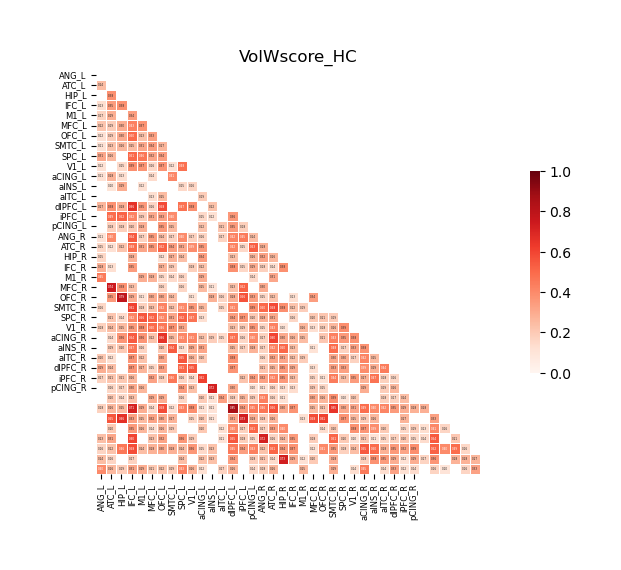

In [23]:
viz.drawCovMatrix(cov_volAtPath_w_dict['HC'], pathNames_TAU_Drop, pathNames_TAU_Drop, 'VolWscore_HC', 
                  outputDir = thickAtPath_Fig,
                  annot_fontsize = 2, tick_fontsize = 6, annot_bool = True, save=True)

In [30]:
import pandas as pd
pd.DataFrame(cov_volAtPath_w_dict['TAU']).head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,NaN,0.161554,0.129808,0.396498,0.526940,0.511009,0.375940,0.356598,NaN,0.418614,...,0.125663,NaN,0.195231,0.289077,NaN,0.309093,0.390955,0.383624,NaN,0.431438
1,0.161554,NaN,0.816296,0.288606,NaN,NaN,0.537193,NaN,NaN,0.655718,...,NaN,NaN,0.443900,0.533250,0.681334,0.169945,0.316564,0.357396,NaN,0.336294
2,0.129808,0.816296,NaN,0.122632,NaN,NaN,0.249214,NaN,NaN,0.459929,...,NaN,NaN,0.238892,0.453114,0.573803,NaN,0.157230,0.152120,NaN,0.172087
3,0.396498,0.288606,0.122632,NaN,0.572285,0.790270,0.543259,0.312939,NaN,0.514416,...,0.246840,NaN,0.336212,0.320767,NaN,0.572203,0.498933,0.467452,NaN,0.580840
4,0.526940,NaN,NaN,0.572285,NaN,0.571820,0.178593,0.220447,0.189727,0.238898,...,0.130700,NaN,0.157597,0.212947,NaN,0.406009,0.450366,0.312465,NaN,0.436805


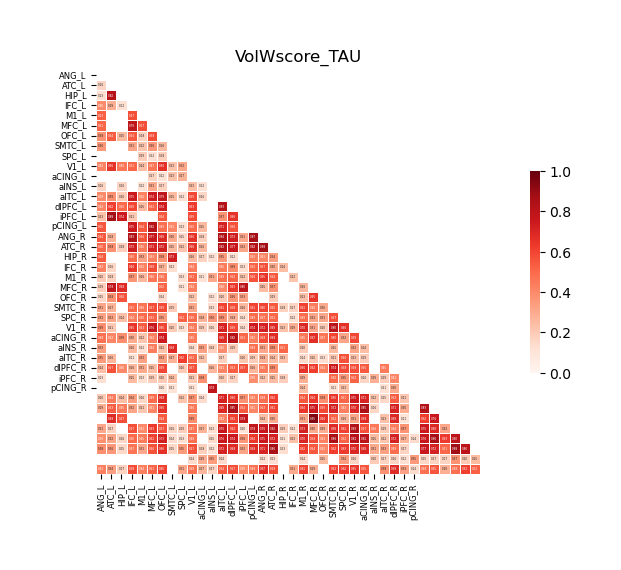

In [24]:
viz.drawCovMatrix(cov_volAtPath_w_dict['TAU'], pathNames_TAU_Drop, pathNames_TAU_Drop, 'VolWscore_TAU', 
                  outputDir = thickAtPath_Fig,
                  annot_fontsize = 2, tick_fontsize = 6, annot_bool = True, save=True)

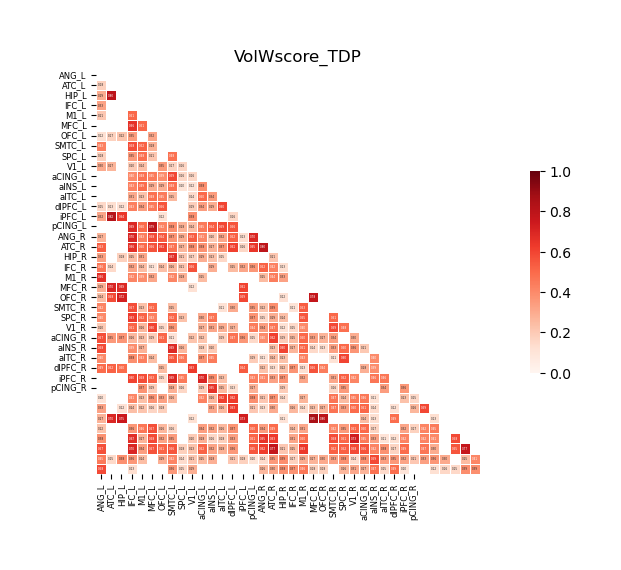

In [25]:
viz.drawCovMatrix(cov_volAtPath_w_dict['TDP'], pathNames_TAU_Drop, pathNames_TAU_Drop, 'VolWscore_TDP', 
                  outputDir = thickAtPath_Fig,
                  annot_fontsize = 2, tick_fontsize = 6, annot_bool = True, save=True)

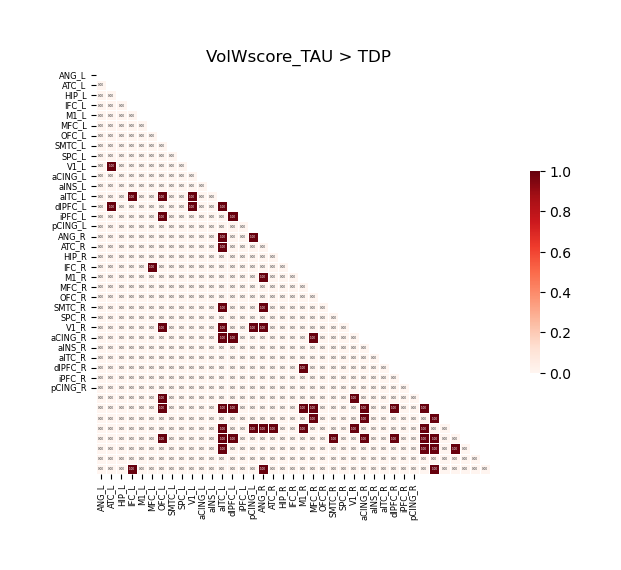

In [26]:
viz.drawCovMatrix(cov_volAtPath_w_dict['TAU_gt_TDP'], pathNames_TAU_Drop, pathNames_TAU_Drop, 'VolWscore_TAU > TDP', 
                  outputDir = thickAtPath_Fig,
                  annot_fontsize = 2, tick_fontsize = 6, annot_bool = True, save=True)

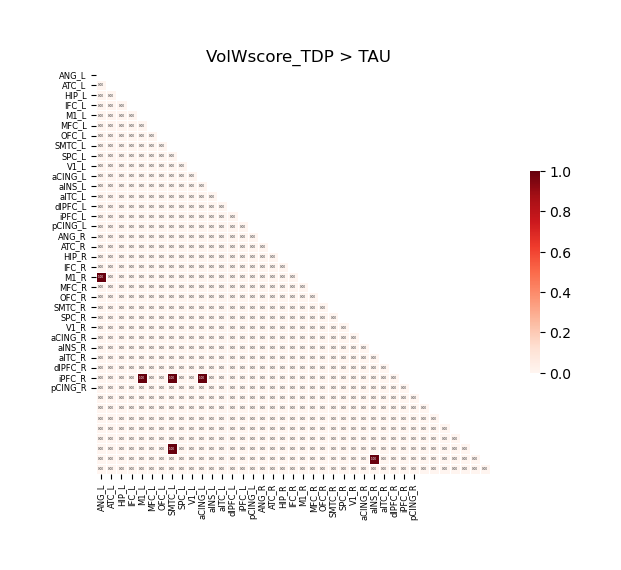

In [27]:
viz.drawCovMatrix(cov_volAtPath_w_dict['TDP_gt_TAU'], pathNames_TAU_Drop, pathNames_TAU_Drop, 'VolWscore_TDP > TAU', 
                  outputDir = thickAtPath_Fig,
                  annot_fontsize = 2, tick_fontsize = 6, annot_bool = True, save=True)

# Saving

## Thickness At Path - Original / Z Score / W Score

In [28]:
# cov_thickAtPath_dict
with open(os.path.join(thickAtPath_CalData, 'cov_thickAtPath_dict.pkl'), 'wb') as f:
    pickle.dump(cov_thickAtPath_dict, f)
f.close()

# cov_thickAtPath_z_dict
with open(os.path.join(thickAtPath_CalData, 'cov_thickAtPath_z_dict.pkl'), 'wb') as f:
    pickle.dump(cov_thickAtPath_z_dict, f)
f.close()

# cov_thickAtPath_w_dict
with open(os.path.join(thickAtPath_CalData, 'cov_thickAtPath_w_dict.pkl'), 'wb') as f:
    pickle.dump(cov_thickAtPath_w_dict, f)
f.close()

## Volume at Path - Original / Z Score / W Score

In [29]:
# cov_volAtPath_dict
with open(os.path.join(thickAtPath_CalData, 'cov_volAtPath_dict.pkl'), 'wb') as f:
    pickle.dump(cov_volAtPath_dict, f)
f.close()

# cov_volAtPath_z_dict
with open(os.path.join(thickAtPath_CalData, 'cov_volAtPath_z_dict.pkl'), 'wb') as f:
    pickle.dump(cov_volAtPath_z_dict, f)
f.close()

# cov_volAtPath_w_dict
with open(os.path.join(thickAtPath_CalData, 'cov_volAtPath_w_dict.pkl'), 'wb') as f:
    pickle.dump(cov_volAtPath_w_dict, f)
f.close()